# Fractional Brownian Motion

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import bm
from lib import plots
from lib import config

# Config Plot Style
pyplot.style.use(config.glyfish_style)

## Fractional Brownian Noise

In [2]:
Δt = 1.0
npts = 1000
time = numpy.linspace(0.0, float(npts)*Δt, npts + 1)
dB = bm.brownian_noise(npts+1)

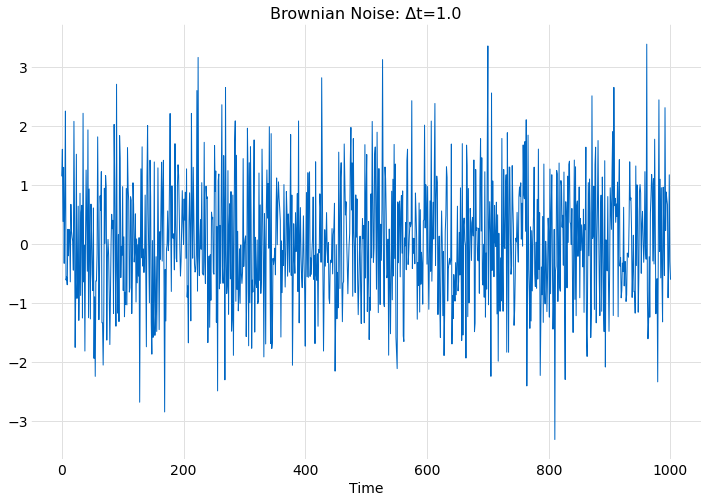

In [3]:
title = f"Brownian Noise: Δt={Δt}"
plots.time_series(dB, time, title)

### Cholesky Fractional Brownian Noise
This noise is created using the Cholesky algorithm.

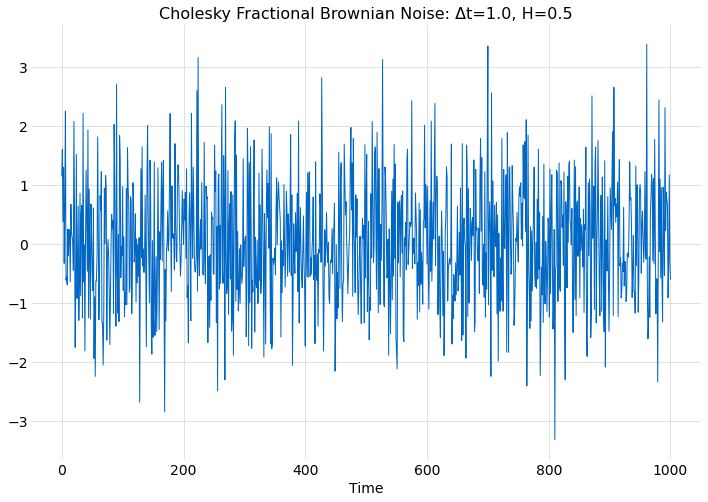

In [4]:
H = 0.5
samples = bm.cholesky_noise(H, npts, dB=dB)
title = f"Cholesky Fractional Brownian Noise: Δt={Δt}, H={H}"
plots.time_series(samples, time, title)

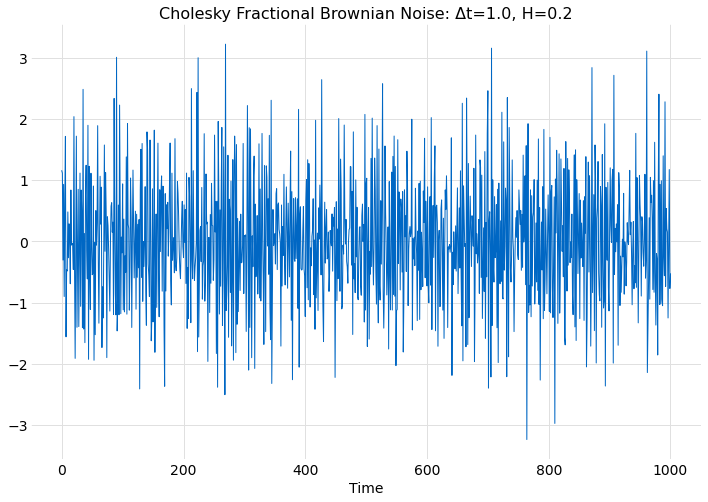

In [5]:
H = 0.2
samples = bm.cholesky_noise(H, npts, dB=dB)
title = f"Cholesky Fractional Brownian Noise: Δt={Δt}, H={H}"
plots.time_series(samples, time, title)

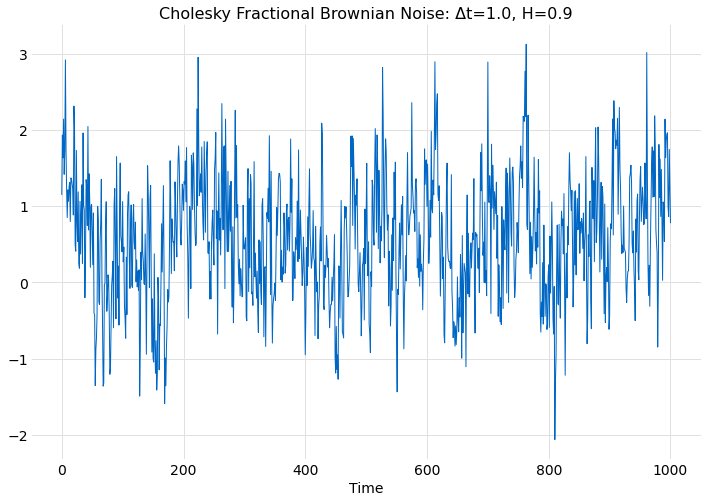

In [6]:
H = 0.9
samples = bm.cholesky_noise(H, npts, dB=dB)
title = f"Cholesky Fractional Brownian Noise: Δt={Δt}, H={H}"
plots.time_series(samples, time, title)

### FFT Fractional Brownian Noise
This noise is created using the FFT algorothm.

In [7]:
Δt = 1.0
npts = 1024
time = numpy.linspace(0.0, float(npts)*Δt, npts)
dB = bm.brownian_noise(2*npts)

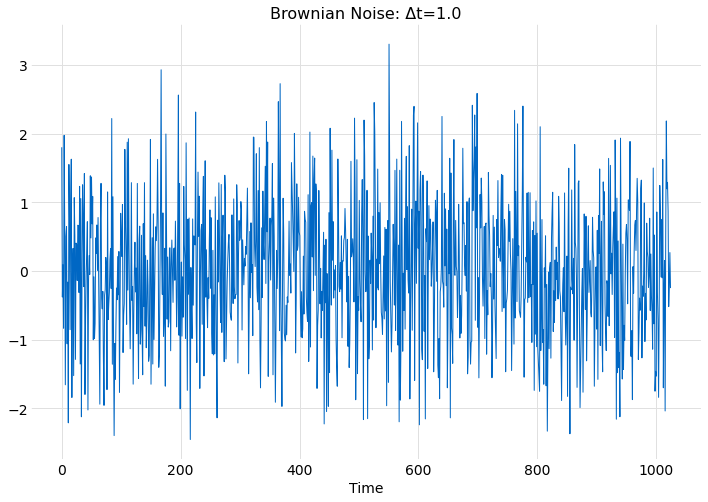

In [8]:
title = f"Brownian Noise: Δt={Δt}"
plots.time_series(dB[:npts], time, title)

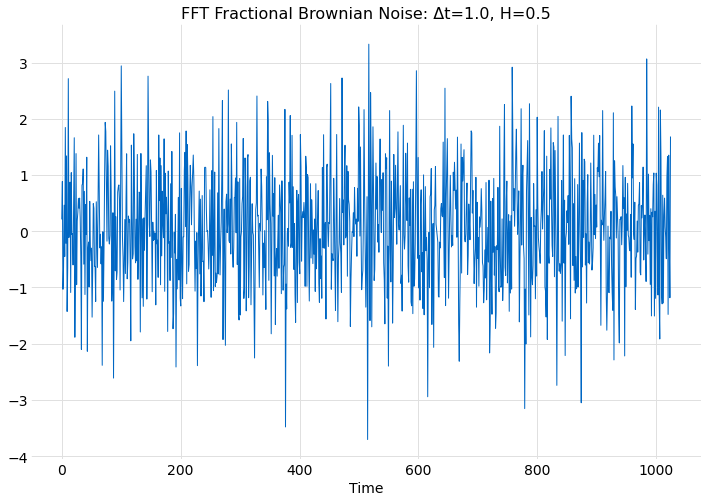

In [10]:
H = 0.5
samples = bm.fft_noise(H, npts, dB=dB)
title = f"FFT Fractional Brownian Noise: Δt={Δt}, H={H}"
plots.time_series(samples, time, title)

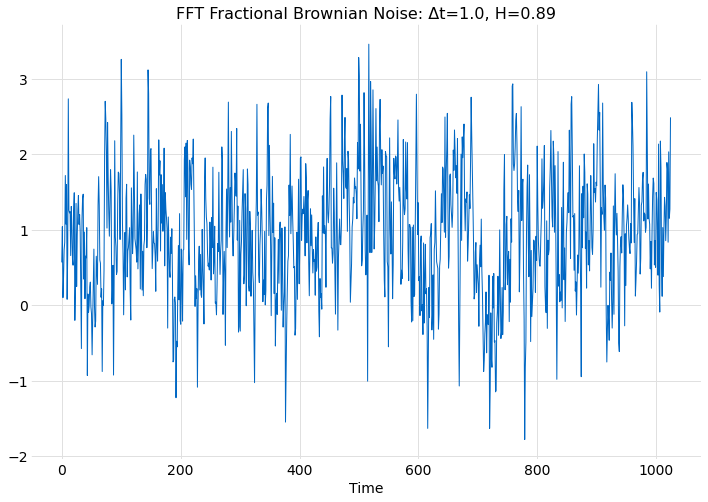

In [11]:
H = 0.89
samples = bm.fft_noise(H, npts, dB=dB)
title = f"FFT Fractional Brownian Noise: Δt={Δt}, H={H}"
plots.time_series(samples, time, title)

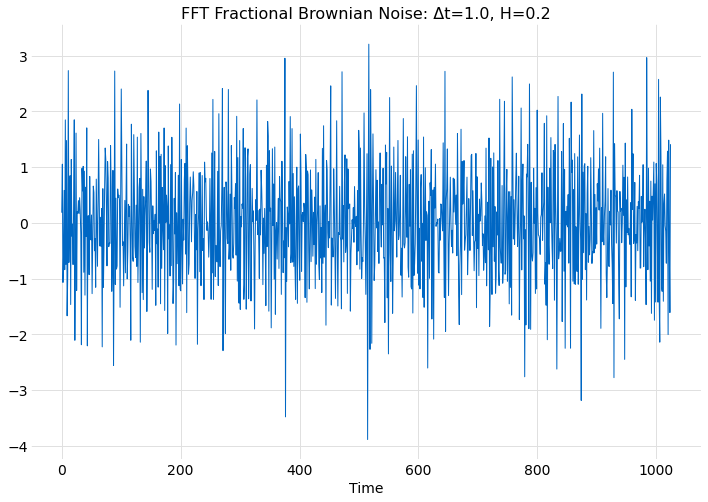

In [12]:
H = 0.2
samples = bm.fft_noise(H, npts, dB=dB)
title = f"FFT Fractional Brownian Noise: Δt={Δt}, H={H}"
plots.time_series(samples, time, title)

## Cholesky Fractional Brownian Motion
Brownian motion created using the Cholesky method.

In [15]:
Δt = 1.0
npts = 1000
time = numpy.linspace(0.0, float(npts)*Δt, npts + 1)

In [16]:
H_vals = [0.55, 0.6, 0.7, 0.8, 0.9, 0.92]
samples = numpy.array([bm.cholesky(H_vals[0], npts)])
for H in H_vals[1:]:
    samples = numpy.append(samples, numpy.array([bm.cholesky(H, npts)]), axis=0)

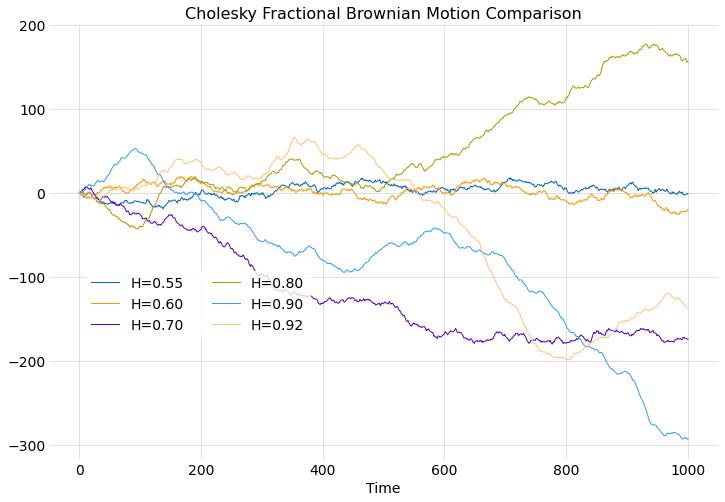

In [17]:
labels = [f"H={format(H, '1.2f')}" for H in H_vals]
title = f"Cholesky Fractional Brownian Motion Comparison"
plots.time_series_comparison(samples, time, labels, (0.4, 0.45), title)

In [18]:
H_vals = [0.05, 0.1, 0.2, 0.3, 0.4, 0.45, 0.5]
samples = numpy.array([bm.cholesky(H_vals[0], npts)])
for H in H_vals[1:]:
    samples = numpy.append(samples, numpy.array([bm.cholesky(H, npts)]), axis=0)

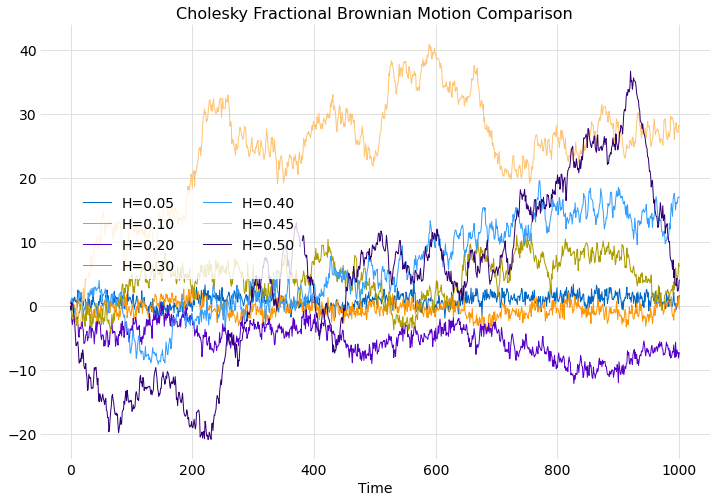

In [19]:
labels = [f"H={format(H, '1.2f')}" for H in H_vals]
title = f"Cholesky Fractional Brownian Motion Comparison"
plots.time_series_comparison(samples, time, labels, (0.4, 0.4), title)

## FFT Brownian Motion
Fractional brownian motion created using the FFT method. This mthod is the fastest and will be used in analysis going forward.

In [20]:
Δt = 1.0
npts = 1024
time = numpy.linspace(0.0, float(npts)*Δt, npts)

In [26]:
H_vals = [0.55, 0.6, 0.7, 0.8, 0.89]
samples = numpy.array([bm.fft(H_vals[0], npts)])
for H in H_vals[1:]:
    samples = numpy.append(samples, numpy.array([bm.fft(H, npts)]), axis=0)

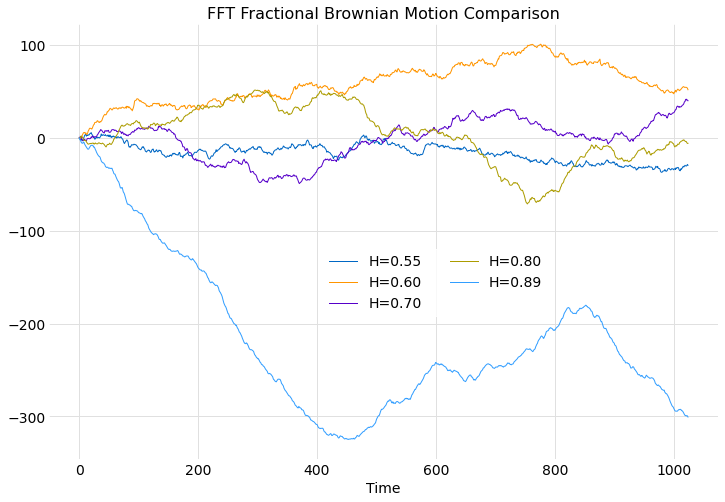

In [27]:
labels = [f"H={format(H, '1.2f')}" for H in H_vals]
title = f"FFT Fractional Brownian Motion Comparison"
plots.time_series_comparison(samples, time, labels, (0.4, 0.5), title)

In [23]:
H_vals = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
samples = numpy.array([bm.fft(H_vals[0], npts)])
for H in H_vals[1:]:
    samples = numpy.append(samples, numpy.array([bm.fft(H, npts)]), axis=0)

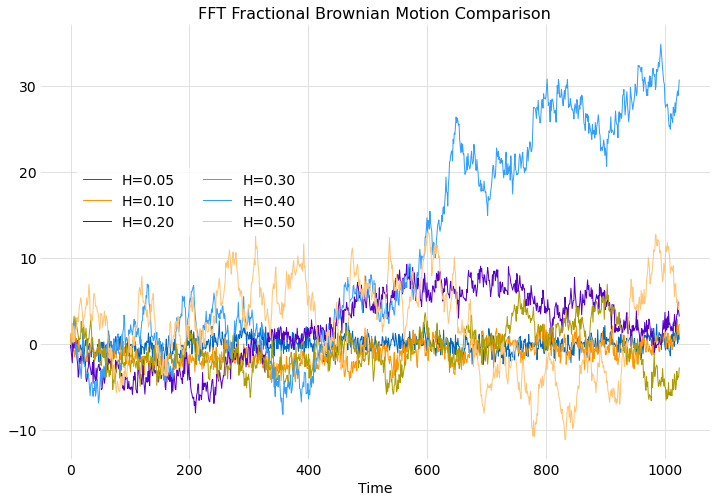

In [25]:
labels = [f"H={format(H, '1.2f')}" for H in H_vals]
title = f"FFT Fractional Brownian Motion Comparison"
plots.time_series_comparison(samples, time, labels, (0.4, 0.5), title)

### H Near 1
The FFT method has issues for values of H near one. `H=0.91` is the largest value for which a solution can be obtained. The Cholesky method, though slower, can obtain solutions in this range as shown below 

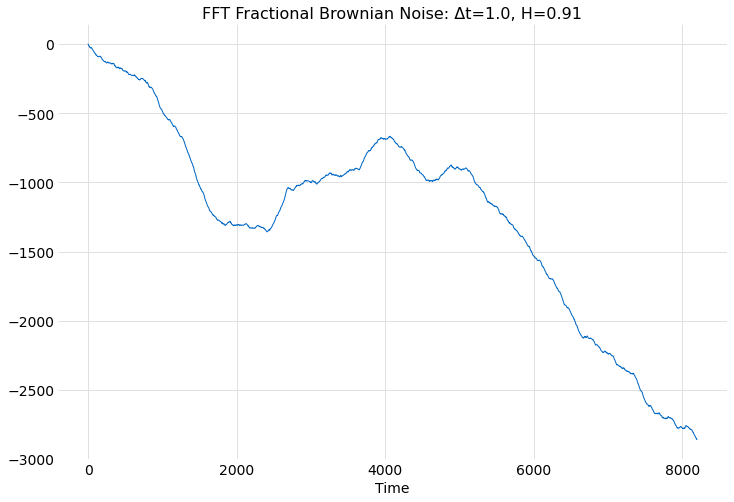

In [33]:
H = 0.91
npts = 8196
time = numpy.linspace(0.0, float(npts)*Δt, npts)
samples = bm.fft(H, npts)
title = f"FFT Fractional Brownian Noise: Δt={Δt}, H={H}"
plots.time_series(samples, time, title)

In [35]:
npts = 1024
H_vals = [0.9, 0.95, 0.99]
samples = numpy.array([bm.cholesky(H_vals[0], npts)])
for H in H_vals[1:]:
    samples = numpy.append(samples, numpy.array([bm.cholesky(H, npts)]), axis=0)

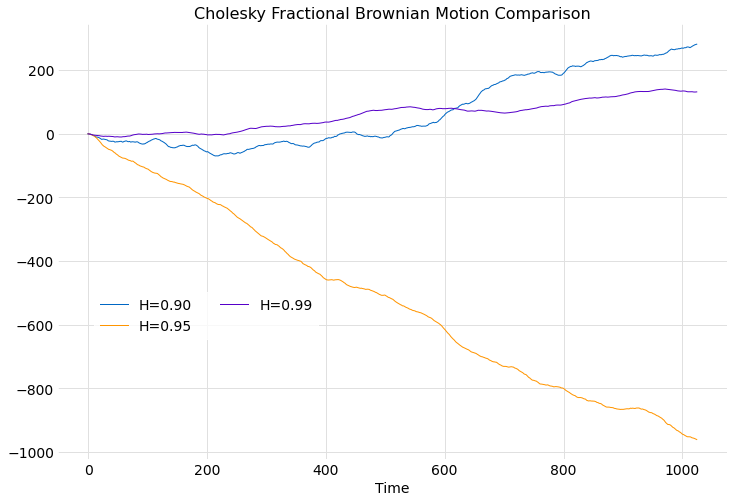

In [38]:
time = numpy.linspace(0.0, float(npts)*Δt, npts+1)
labels = [f"H={format(H, '1.2f')}" for H in H_vals]
title = f"Cholesky Fractional Brownian Motion Comparison"
plots.time_series_comparison(samples, time, labels, (0.4, 0.4), title)